In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
IMG_SIZE =224
BATCH_SIZE =32
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=train_datagen.flow_from_directory(
'/content/drive/MyDrive/Team 8/data',
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='training')

Found 56 images belonging to 3 classes.


In [21]:
val_generator=train_datagen.flow_from_directory(
'/content/drive/MyDrive/Team 8/data',
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='validation')

Found 14 images belonging to 3 classes.


In [22]:
class_indices = train_generator.class_indices
#extract class names
class_names = list(class_indices.keys())
print("Class indices:", class_indices)
print("Class names:", class_names)

Class indices: {'Nandhinis': 0, 'Ram Prasaths': 1, 'praveenas': 2}
Class names: ['Nandhinis', 'Ram Prasaths', 'praveenas']


In [23]:
model=keras.Sequential([
layers.Conv2D(32,
(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Conv2D(128,(3,3),activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(3,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics
=['accuracy'])
model.fit(train_generator,validation_data=val_generator,epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 12s/step - accuracy: 0.2421 - loss: 4.3311 - val_accuracy: 0.5714 - val_loss: 1.7521
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.4048 - loss: 2.0127 - val_accuracy: 0.2857 - val_loss: 1.1610
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.5179 - loss: 1.0579 - val_accuracy: 0.5714 - val_loss: 1.0057
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.5789 - loss: 1.0373 - val_accuracy: 0.5714 - val_loss: 0.9958
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.5734 - loss: 0.9625 - val_accuracy: 0.5714 - val_loss: 0.9813
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.6250 - loss: 0.9019 - val_accuracy: 0.5714 - val_loss: 0.9828
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.8512 - loss: 0.8663 - val_accuracy: 0.5714 - val_loss: 0.9304
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.5372 - loss: 0.8024 - val_accuracy: 0.5714 - val_loss: 0.9312
Epoch 9/10
2

In [25]:
model.save('/content/drive/MyDrive/Team 8/data.h5')

In [27]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/Team 8/data.h5')
print("Model Loaded")



Model Loaded


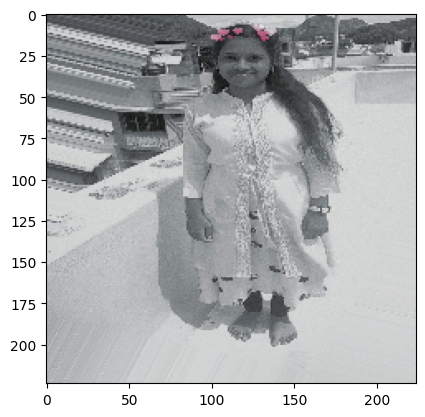

In [32]:

test_image_path="/content/drive/MyDrive/Team 8/data/praveenas/aug_0_1057.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [33]:

img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255
#make predictions
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
praveenas
